# TELECOM X

In [6]:
# ===== 0) Setup =====
import os, json, io, textwrap
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option("display.max_columns", 120)
pd.set_option("display.width", 180)



In [7]:
# ===== 1A) SUBIR ARCHIVO DESDE TU PC =====
from google.colab import files

print("👉 Selecciona tu archivo TelecomX_Data.json")
uploaded = files.upload()  # elige TelecomX_Data.json
LOCAL_JSON_PATH = "TelecomX_Data.json"  # se guarda con este nombre por defecto

with open(LOCAL_JSON_PATH, "r", encoding="utf-8") as f:
    data = json.load(f)



👉 Selecciona tu archivo TelecomX_Data.json


Saving TelecomX_Data.json to TelecomX_Data (1).json


In [8]:
# ===== 2) Estructura / Normalización =====
# Convierte JSON jerárquico en tabla plana
df_raw = pd.json_normalize(data)

# Normaliza nombres de columnas: minúsculas + puntos->guiones_bajos
df = df_raw.copy()
df.columns = [c.lower().replace(".", "_") for c in df.columns]

print("Dimensiones:", df.shape)
display(df.head(5))

# Resumen de columnas, tipos, nulos, únicos, ejemplos
def summarize_dtypes(frame: pd.DataFrame) -> pd.DataFrame:
    rows = []
    for col in frame.columns:
        ser = frame[col]
        ex_vals = ser.dropna().unique()[:5]
        rows.append({
            "column": col,
            "dtype": str(ser.dtype),
            "non_null": int(ser.notna().sum()),
            "nulls": int(ser.isna().sum()),
            "unique": int(ser.nunique(dropna=True)),
            "example_values": ", ".join(map(str, ex_vals))
        })
    return pd.DataFrame(rows).sort_values("column").reset_index(drop=True)

dtypes_summary = summarize_dtypes(df)
display(dtypes_summary)

print("\nInfo():")
df.info()


Dimensiones: (7267, 21)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


,column,dtype,non_null,nulls,unique,example_values
0,account_charges_monthly,float64,7267,0,1585,"65.6, 59.9, 73.9, 98.0, 83.9"
1,account_charges_total,object,7267,0,6531,"593.3, 542.4, 280.85, 1237.85, 267.4"
2,account_contract,object,7267,0,3,"One year, Month-to-month, Two year"
3,account_paperlessbilling,object,7267,0,2,"Yes, No"
4,account_paymentmethod,object,7267,0,4,"Mailed check, Electronic check, Credit card (a..."
5,churn,object,7267,0,3,"No, Yes,"
6,customer_dependents,object,7267,0,2,"Yes, No"
7,customer_gender,object,7267,0,2,"Female, Male"
8,customer_partner,object,7267,0,2,"Yes, No"
9,customer_seniorcitizen,int64,7267,0,2,"0, 1"



Info():
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   customerid                 7267 non-null   object 
 1   churn                      7267 non-null   object 
 2   customer_gender            7267 non-null   object 
 3   customer_seniorcitizen     7267 non-null   int64  
 4   customer_partner           7267 non-null   object 
 5   customer_dependents        7267 non-null   object 
 6   customer_tenure            7267 non-null   int64  
 7   phone_phoneservice         7267 non-null   object 
 8   phone_multiplelines        7267 non-null   object 
 9   internet_internetservice   7267 non-null   object 
 10  internet_onlinesecurity    7267 non-null   object 
 11  internet_onlinebackup      7267 non-null   object 
 12  internet_deviceprotection  7267 non-null   object 
 13  internet_techsupport       7267 non-nul

In [9]:
# ===== 3) Data Quality Checks =====
issues = {}

# Clave primaria candidata
key_col = "customerid" if "customerid" in df.columns else None

# Duplicados
dup_count = df.duplicated(subset=[key_col]).sum() if key_col else df.duplicated().sum()
issues["duplicate_count"] = int(dup_count)

# Churn vacío o nulo
if "churn" in df.columns:
    churn_clean = df["churn"].replace("", np.nan)
    issues["churn_null_or_empty"] = int(churn_clean.isna().sum())
else:
    issues["churn_null_or_empty"] = None

# Verificación de cargos numéricos
charges_monthly_col = "account_charges_monthly" if "account_charges_monthly" in df.columns else None
charges_total_col   = "account_charges_total"   if "account_charges_total"   in df.columns else None

def is_numeric_series(series: pd.Series) -> bool:
    try:
        pd.to_numeric(series.dropna().astype(str), errors="raise")
        return True
    except Exception:
        return False

issues["monthly_numeric_like"] = (is_numeric_series(df[charges_monthly_col]) if charges_monthly_col else None)
issues["total_numeric_like"]   = (is_numeric_series(df[charges_total_col])   if charges_total_col   else None)

# Columnas con tokens "No internet service"/"No phone service"
cat_cols = [c for c in df.columns if df[c].dtype == "object"]
cols_with_no_service = []
for c in cat_cols:
    vals = set(df[c].dropna().unique())
    if "No internet service" in vals or "No phone service" in vals:
        cols_with_no_service.append(c)
issues["columns_with_no_service_tokens"] = cols_with_no_service

display(pd.DataFrame([issues]))


,duplicate_count,churn_null_or_empty,monthly_numeric_like,total_numeric_like,columns_with_no_service_tokens
0,0,224,True,False,"[phone_multiplelines, internet_onlinesecurity,..."


In [10]:
# ===== 4) Limpieza =====
clean = df.copy()

# Normaliza objetivo Churn y trata vacíos
if "churn" in clean.columns:
    clean["churn"] = clean["churn"].replace("", np.nan).astype("string")

# Reemplaza tokens "no service" por "No" en columnas binarias
no_tokens = {"No internet service": "No", "No phone service": "No"}
for c in cols_with_no_service:
    if c != "internet_internetservice":  # el tipo de servicio debe mantenerse
        clean[c] = clean[c].replace(no_tokens)

# Convierte cargos a numérico
if charges_monthly_col:
    clean[charges_monthly_col] = pd.to_numeric(clean[charges_monthly_col], errors="coerce")
if charges_total_col:
    clean[charges_total_col] = pd.to_numeric(clean[charges_total_col], errors="coerce")

# Homologar Yes/No (si, sí => Yes)
def normalize_yes_no(x):
    if pd.isna(x): return x
    s = str(x).strip().lower()
    if s in {"yes","y","si","sí"}: return "Yes"
    if s in {"no","n"}:            return "No"
    return x

for c in cat_cols:
    if clean[c].dtype == "object":
        mask = clean[c].notna()
        clean.loc[mask, c] = clean.loc[mask, c].apply(normalize_yes_no)

# Eliminar duplicados
if key_col and clean.duplicated(subset=[key_col]).any():
    clean = clean.drop_duplicates(subset=[key_col]).reset_index(drop=True)
else:
    clean = clean.drop_duplicates().reset_index(drop=True)

# Dataset para EDA (sin Churn vacío)
eda = clean.dropna(subset=["churn"]).reset_index(drop=True) if "churn" in clean.columns else clean.copy()

print("Dimensiones post-limpieza:", eda.shape)
display(eda.head(5))


Dimensiones post-limpieza: (7043, 21)


,customerid,churn,customer_gender,customer_seniorcitizen,customer_partner,customer_dependents,customer_tenure,phone_phoneservice,phone_multiplelines,internet_internetservice,internet_onlinesecurity,internet_onlinebackup,internet_deviceprotection,internet_techsupport,internet_streamingtv,internet_streamingmovies,account_contract,account_paperlessbilling,account_paymentmethod,account_charges_monthly,account_charges_total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [11]:
# ===== 5) Cuentas_Diarias =====
if charges_monthly_col and charges_monthly_col in eda.columns:
    eda["cuentas_diarias"] = eda[charges_monthly_col] / 30.0

cols_preview = ["churn", "customer_customerid" if "customer_customerid" in eda.columns else "customerid"]
for c in [charges_monthly_col, "cuentas_diarias", "customer_tenure", charges_total_col]:
    if c and c in eda.columns: cols_preview.append(c)

display(eda[ [c for c in cols_preview if c in eda.columns] ].head(8))


,churn,customerid,account_charges_monthly,cuentas_diarias,customer_tenure,account_charges_total
0,No,0002-ORFBO,65.60,2.186667,9,593.30
1,No,0003-MKNFE,59.90,1.996667,9,542.40
2,Yes,0004-TLHLJ,73.90,2.463333,4,280.85
3,Yes,0011-IGKFF,98.00,3.266667,13,1237.85
4,Yes,0013-EXCHZ,83.90,2.796667,3,267.40
5,No,0013-MHZWF,69.40,2.313333,9,571.45
6,No,0013-SMEOE,109.70,3.656667,71,7904.25
7,No,0014-BMAQU,84.65,2.821667,63,5377.80


In [12]:
# ===== 6) Estandarización (opc): columnas binarias *_bin =====
encoded = eda.copy()

yn_cols = []
for c in encoded.columns:
    if encoded[c].dtype == "object":
        uniq = set(encoded[c].dropna().unique())
        if len(uniq) > 0 and uniq.issubset({"Yes", "No"}):
            yn_cols.append(c)

for c in yn_cols:
    encoded[c + "_bin"] = encoded[c].map({"Yes": 1, "No": 0}).astype("float")

if "churn" in encoded.columns:
    encoded["churn_bin"] = encoded["churn"].map({"Yes": 1, "No": 0}).astype("float")

print("Binarias creadas:", len(yn_cols))


Binarias creadas: 11


In [13]:
# ===== 7) Descriptivos =====
numeric_cols = encoded.select_dtypes(include=[np.number]).columns.tolist()
desc_table = encoded[numeric_cols].describe().T.round(3)
display(desc_table)


,count,mean,std,min,25%,50%,75%,max
customer_seniorcitizen,7043.0,0.162,0.369,0.000,0.000,0.000,0.000,1.000
customer_tenure,7043.0,32.371,24.559,0.000,9.000,29.000,55.000,72.000
account_charges_monthly,7043.0,64.762,30.090,18.250,35.500,70.350,89.850,118.750
account_charges_total,7032.0,2283.300,2266.771,18.800,401.450,1397.475,3794.738,8684.800
cuentas_diarias,7043.0,2.159,1.003,0.608,1.183,2.345,2.995,3.958
customer_partner_bin,7043.0,0.483,0.500,0.000,0.000,0.000,1.000,1.000
customer_dependents_bin,7043.0,0.300,0.458,0.000,0.000,0.000,1.000,1.000
phone_phoneservice_bin,7043.0,0.903,0.296,0.000,1.000,1.000,1.000,1.000
phone_multiplelines_bin,7043.0,0.422,0.494,0.000,0.000,0.000,1.000,1.000
internet_onlinesecurity_bin,7043.0,0.287,0.452,0.000,0.000,0.000,1.000,1.000


churn
No     5174
Yes    1869
Name: count, dtype: Int64


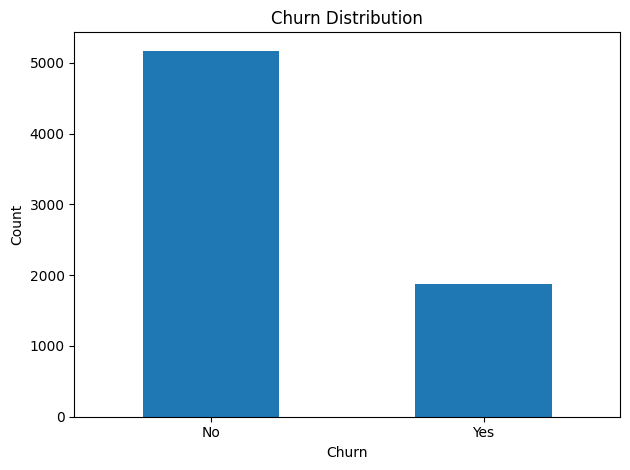

In [14]:
# ===== 8) Distribución Churn =====
if "churn" in eda.columns:
    print(eda["churn"].value_counts(dropna=False))
    plt.figure()
    eda["churn"].value_counts().plot(kind="bar", rot=0)
    plt.title("Churn Distribution")
    plt.xlabel("Churn")
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


'=== account_contract ==='

,account_contract,churn_rate_yes,n
0,Month-to-month,0.427,3875
1,One year,0.113,1473
2,Two year,0.028,1695


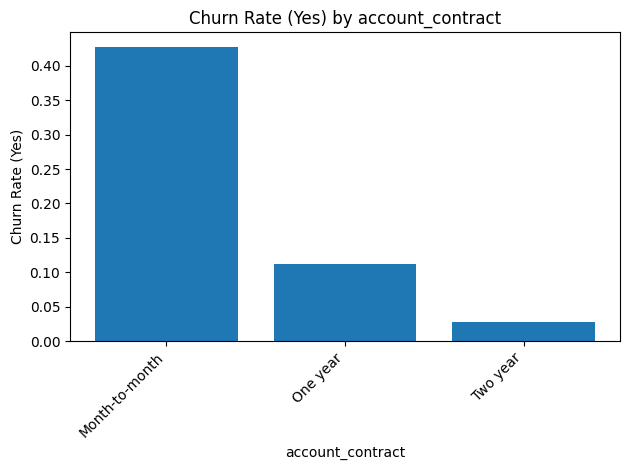

'=== account_paymentmethod ==='

,account_paymentmethod,churn_rate_yes,n
2,Electronic check,0.453,2365
3,Mailed check,0.191,1612
0,Bank transfer (automatic),0.167,1544
1,Credit card (automatic),0.152,1522


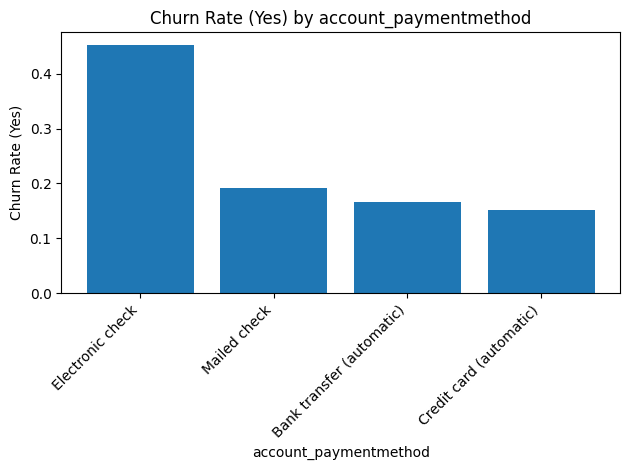

'=== account_paperlessbilling ==='

,account_paperlessbilling,churn_rate_yes,n
1,Yes,0.336,4171
0,No,0.163,2872


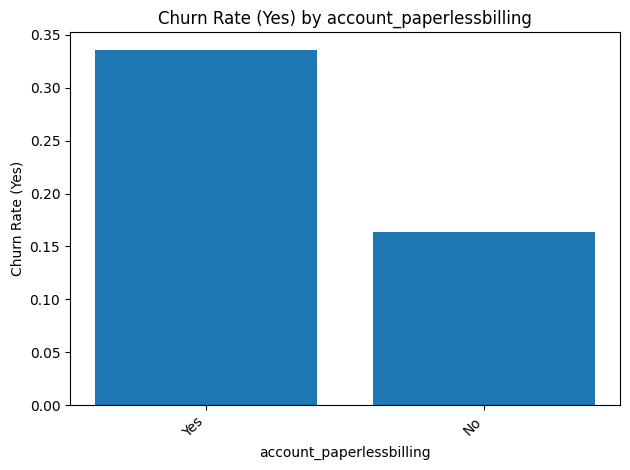

'=== internet_internetservice ==='

,internet_internetservice,churn_rate_yes,n
1,Fiber optic,0.419,3096
0,DSL,0.190,2421
2,No,0.074,1526


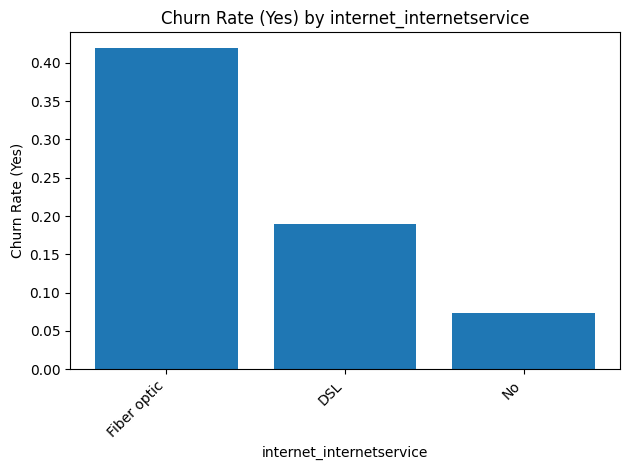

'=== internet_onlinesecurity ==='

,internet_onlinesecurity,churn_rate_yes,n
0,No,0.313,5024
1,Yes,0.146,2019


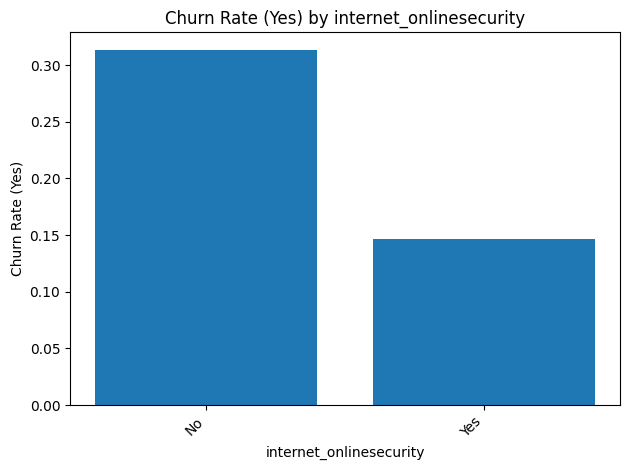

'=== internet_techsupport ==='

,internet_techsupport,churn_rate_yes,n
0,No,0.312,4999
1,Yes,0.152,2044


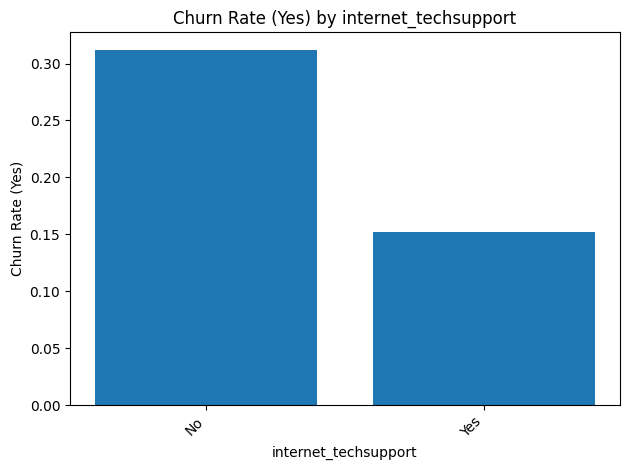

'=== phone_phoneservice ==='

,phone_phoneservice,churn_rate_yes,n
1,Yes,0.267,6361
0,No,0.249,682


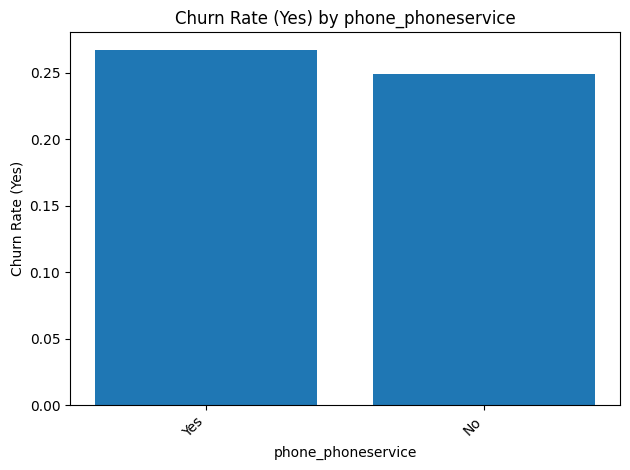

'=== phone_multiplelines ==='

,phone_multiplelines,churn_rate_yes,n
1,Yes,0.286,2971
0,No,0.250,4072


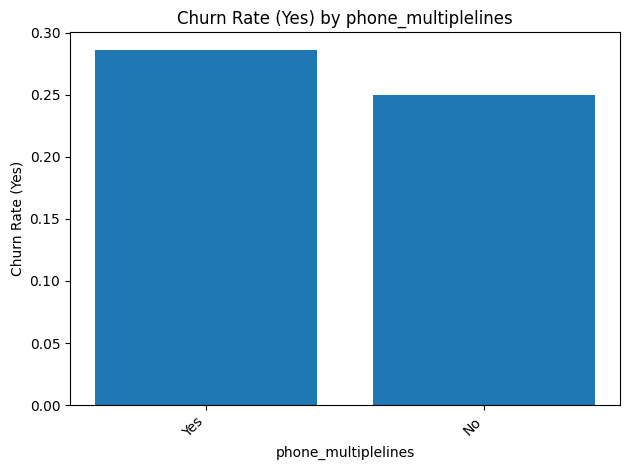

In [15]:
# ===== 9) Churn por categóricas =====
def churn_rate_by_category(frame, cat_col):
    sub = frame[[cat_col, "churn"]].dropna()
    grp = sub.groupby(cat_col)["churn"].value_counts(normalize=True).rename("rate").reset_index()
    yes_rate = grp[grp["churn"]=="Yes"].drop(columns=["churn"]).rename(columns={"rate":"churn_rate_yes"})
    counts = sub.groupby(cat_col).size().rename("n").reset_index()
    out = yes_rate.merge(counts, on=cat_col, how="left").sort_values("churn_rate_yes", ascending=False)
    return out

categoricals_to_check = [
    "account_contract",
    "account_paymentmethod",
    "account_paperlessbilling",
    "internet_internetservice",
    "internet_onlinesecurity",
    "internet_techsupport",
    "phone_phoneservice",
    "phone_multiplelines"
]
categoricals_to_check = [c for c in categoricals_to_check if c in eda.columns]

for c in categoricals_to_check:
    tab = churn_rate_by_category(eda, c)
    display(f"=== {c} ===", tab.round(3))
    plt.figure()
    plt.bar(tab[c].astype(str), tab["churn_rate_yes"])
    plt.title(f"Churn Rate (Yes) by {c}")
    plt.xlabel(c)
    plt.ylabel("Churn Rate (Yes)")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()


/tmp/ipython-input-2464042265.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no.values, data_yes.values], labels=["No","Yes"], vert=True, showfliers=False)


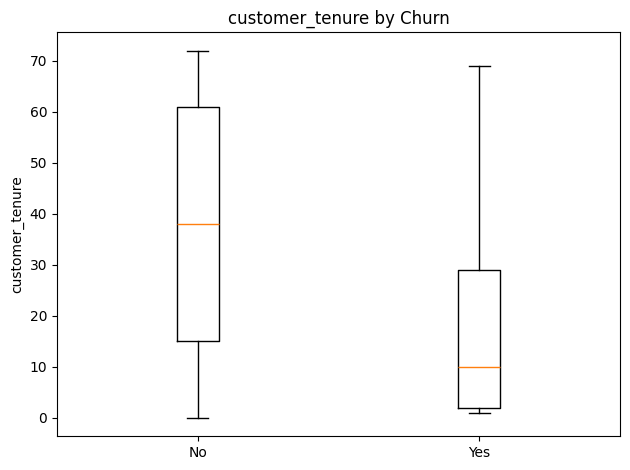

/tmp/ipython-input-2464042265.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no.values, data_yes.values], labels=["No","Yes"], vert=True, showfliers=False)


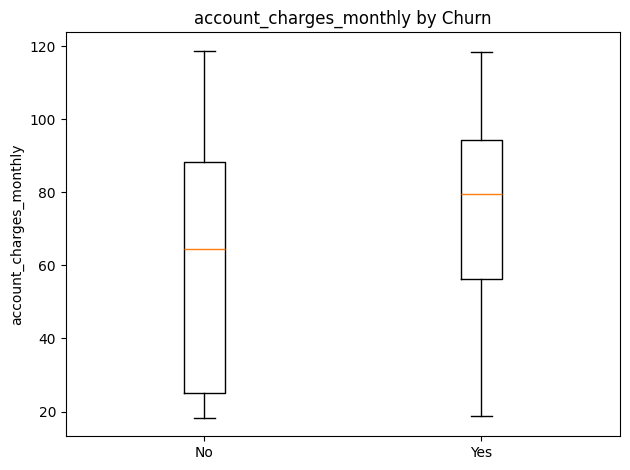

/tmp/ipython-input-2464042265.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no.values, data_yes.values], labels=["No","Yes"], vert=True, showfliers=False)


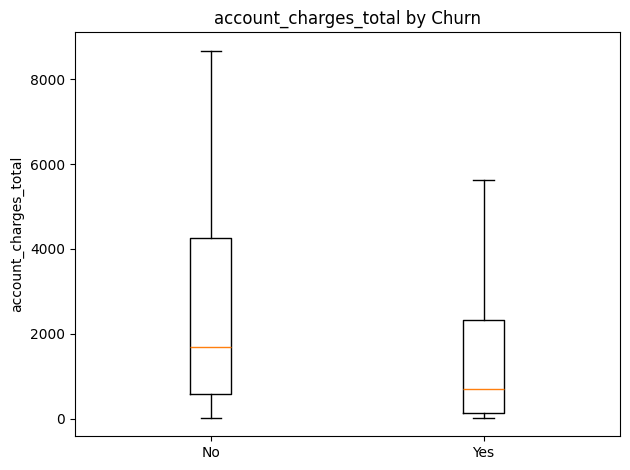

/tmp/ipython-input-2464042265.py:13: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data_no.values, data_yes.values], labels=["No","Yes"], vert=True, showfliers=False)


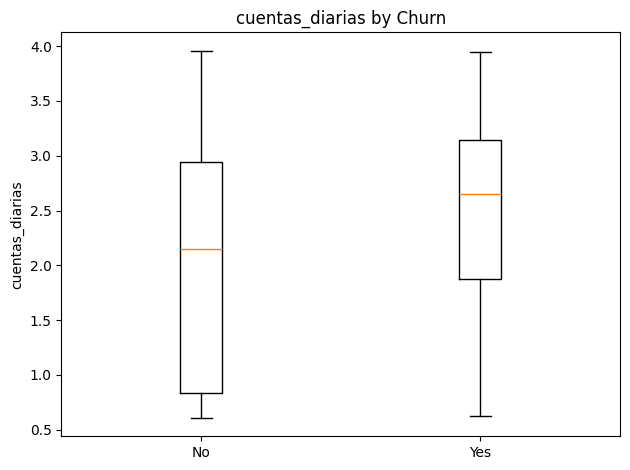

In [16]:
# ===== 10) Numéricas vs Churn =====
num_candidates = []
for col in ["customer_tenure", charges_monthly_col, charges_total_col, "cuentas_diarias"]:
    if col and col in eda.columns:
        num_candidates.append(col)

for col in num_candidates:
    if "churn" in eda.columns:
        plt.figure()
        data_no  = eda.loc[eda["churn"]=="No",  col].dropna()
        data_yes = eda.loc[eda["churn"]=="Yes", col].dropna()
        if len(data_no) and len(data_yes):
            plt.boxplot([data_no.values, data_yes.values], labels=["No","Yes"], vert=True, showfliers=False)
            plt.title(f"{col} by Churn")
            plt.ylabel(col)
            plt.tight_layout()
            plt.show()


In [17]:
# ===== 11) Guardar outputs =====
clean_path   = "/content/telecomx_clean.csv"
encoded_path = "/content/telecomx_clean_encoded.csv"

eda.to_csv(clean_path, index=False)
encoded.to_csv(encoded_path, index=False)

# ===== Informe final (Markdown) =====
insights = []

# Churn global
if "churn" in eda.columns:
    overall_rate = (eda["churn"]=="Yes").mean()
    insights.append(f"- Overall churn rate: {overall_rate:.2%}")

# Top factores (categóricas)
def top_factor_sentence(frame, cat_col, top_k=3, min_n=20):
    try:
        tab = churn_rate_by_category(frame, cat_col)
        tab = tab[tab["n"]>=min_n]
        if len(tab)==0: return None
        top = tab.head(top_k)
        parts = [f"{row[cat_col]} ({row['churn_rate_yes']:.1%}, n={int(row['n'])})" for _,row in top.iterrows()]
        return f"- Highest churn in **{cat_col}**: " + "; ".join(parts)
    except Exception:
        return None

for c in ["account_contract","account_paymentmethod","internet_internetservice","internet_onlinesecurity","account_paperlessbilling"]:
    if c in eda.columns:
        s = top_factor_sentence(eda, c, top_k=3, min_n=10)
        if s: insights.append(s)

# Comparación de medianas (numéricas)
def median_compare(frame, col):
    if col in frame.columns and "churn" in frame.columns:
        med_no  = frame.loc[frame["churn"]=="No",  col].median()
        med_yes = frame.loc[frame["churn"]=="Yes", col].median()
        if pd.notna(med_no) and pd.notna(med_yes):
            return f"- Median {col}: No={med_no:.2f}, Yes={med_yes:.2f}"
    return None

for col in ["customer_tenure", charges_monthly_col, charges_total_col, "cuentas_diarias"]:
    if col:
        s = median_compare(eda, col)
        if s: insights.append(s)

report_md = f"""
# Telecom X - Informe EDA & Limpieza

## Objetivo
Analizar la evasión de clientes (churn), limpiar y preparar los datos y extraer patrones que orienten estrategias de retención.

## Limpieza y Tratamiento
- Estandarización de categorías 'Yes/No' y reemplazo de 'No internet service'/'No phone service' por 'No' en columnas binarias.
- Conversión de cargos (`account_charges_monthly`, `account_charges_total`) a numérico.
- Eliminación de duplicados.
- Filtrado de registros con `churn` vacío para el EDA.
- Creación de **cuentas_diarias = account_charges_monthly / 30**.

## Análisis Descriptivo
Incluye distribución de Churn, tasas por variables categóricas y boxplots de variables numéricas por Churn.

## Insights Clave
{os.linesep.join(insights) if insights else "- (Se requieren más datos para extraer conclusiones.)"}

## Recomendaciones
- Priorizar retención en clientes con contrato **Month-to-month**, pagos vía **Electronic check** y cargos mensuales altos.
- Incentivar seguridad/soporte (p. ej., **OnlineSecurity**, **TechSupport**) si su ausencia se asocia a mayor churn.
- Diseñar ofertas para clientes con **tenure bajo**.
- Revisar precio/experiencia en **Fiber optic** si presenta churn alto.
""".strip()

report_path = "/content/telecomx_informe_eda.md"
with open(report_path, "w", encoding="utf-8") as f:
    f.write(report_md)

print("✅ Archivos guardados:")
print(" - Limpio:", clean_path)
print(" - Limpio + binario:", encoded_path)
print(" - Informe:", report_path)


✅ Archivos guardados:
 - Limpio: /content/telecomx_clean.csv
 - Limpio + binario: /content/telecomx_clean_encoded.csv
 - Informe: /content/telecomx_informe_eda.md


In [19]:
# ===== 12) Descarga directa =====
from google.colab import files
files.download("/content/telecomx_clean.csv")
files.download("/content/telecomx_clean_encoded.csv")
files.download("/content/telecomx_informe_eda.md")
print("Descomenta las líneas de files.download(...) para descargar.")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Descomenta las líneas de files.download(...) para descargar.
